In [10]:
import os
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import random

import ngrams
import mcmc

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yaoda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\yaoda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [11]:
file_path = os.path.join(os.getcwd(), '..', 'data', 'pg2554.txt')

df_char_1 = ngrams.load_ngrams(file_path, 'char', 1)
df_char_2 = ngrams.load_ngrams(file_path, 'char', 2)

df_word_1 = ngrams.load_ngrams(file_path, 'word', 1)
df_word_2 = ngrams.load_ngrams(file_path, 'word', 2)

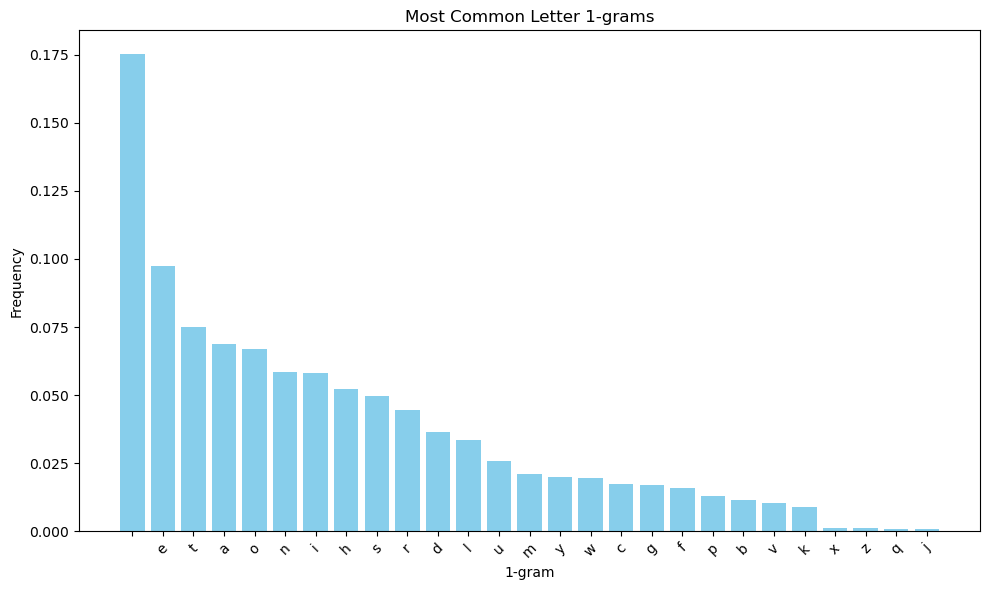

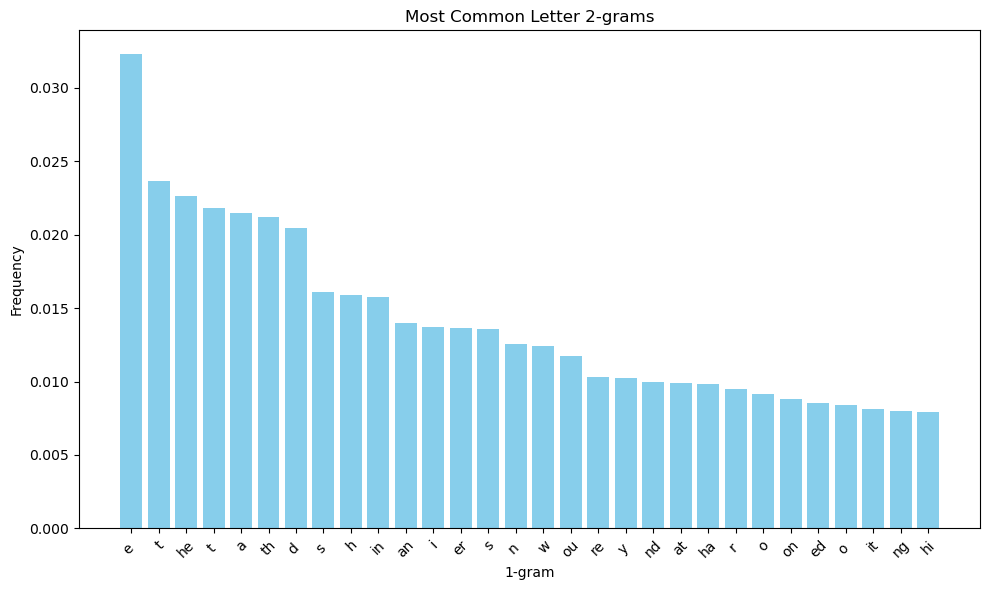

In [12]:
df_char_1_top = df_char_1.head(30)

plt.figure(figsize=(10,6))
plt.bar(df_char_1_top['1-gram'], df_char_1_top['frequency'], color='skyblue')
plt.xlabel("1-gram")
plt.ylabel("Frequency")
plt.title("Most Common Letter 1-grams")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df_char_2_top = df_char_2.head(30)

plt.figure(figsize=(10,6))
plt.bar(df_char_2_top['2-gram'], df_char_2_top['frequency'], color='skyblue')
plt.xlabel("1-gram")
plt.ylabel("Frequency")
plt.title("Most Common Letter 2-grams")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

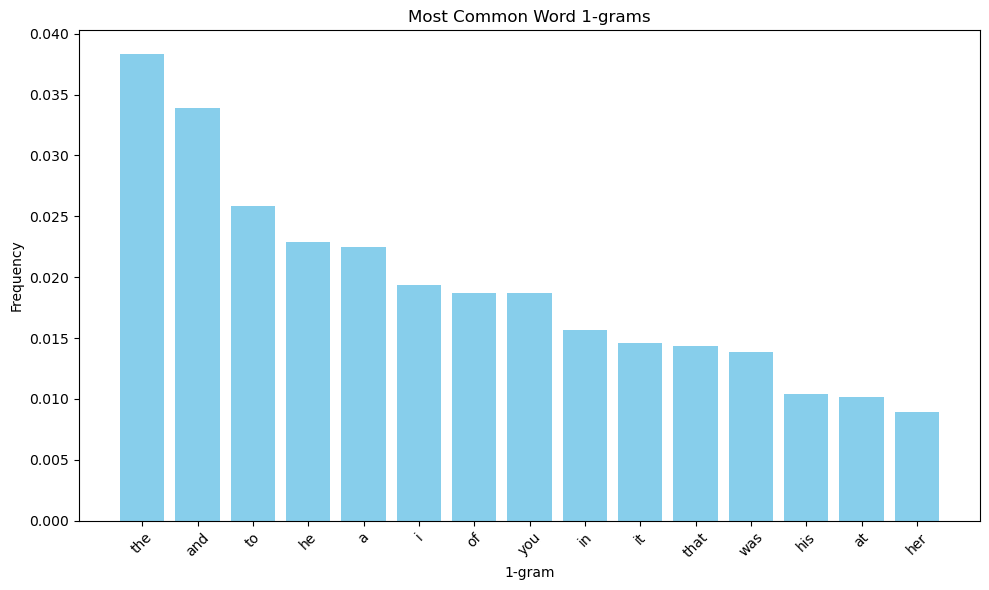

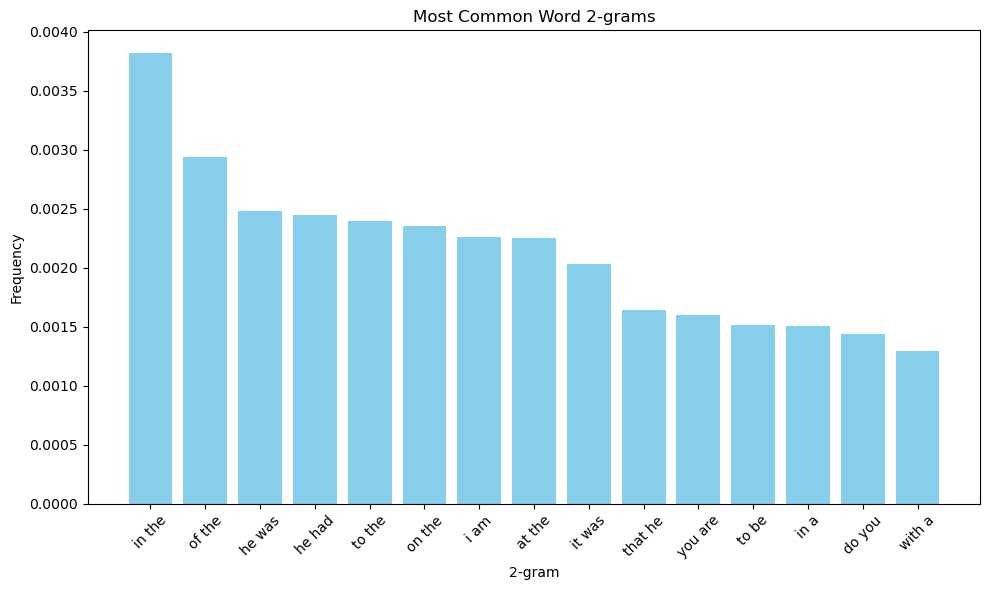

In [13]:
df_word_1_top = df_word_1.head(15).copy()
df_word_1_top.loc[:, '1-gram'] = df_word_1_top['1-gram'].apply(lambda x: ' '.join(x) if isinstance(x, tuple) else x).str.lower()

plt.figure(figsize=(10,6))
plt.bar(df_word_1_top['1-gram'], df_word_1_top['frequency'], color='skyblue')
plt.xlabel("1-gram")
plt.ylabel("Frequency")
plt.title("Most Common Word 1-grams")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df_word_2_top = df_word_2.head(15).copy()
df_word_2_top.loc[:, '2-gram'] = df_word_2_top['2-gram'].apply(lambda x: ' '.join(x) if isinstance(x, tuple) else x).str.lower()

plt.figure(figsize=(10,6))
plt.bar(df_word_2_top['2-gram'], df_word_2_top['frequency'], color='skyblue')
plt.xlabel("2-gram")
plt.ylabel("Frequency")
plt.title("Most Common Word 2-grams")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
df_char_3 = ngrams.load_ngrams(file_path, 'char', 3)
text1 = ngrams.generate_text(df_char_3, 'char', 3, 90)
print(text1)

df_word_3 = ngrams.load_ngrams(file_path, 'word', 3)
text2 = ngrams.generate_text(df_word_3, 'word', 3, 30)
print(text2)

100%|██████████| 87/87 [00:00<00:00, 369.84it/s]


alhishein foread of th alwall ing the noway covidnother pere frove tr youtsy hin th himmon


100%|██████████| 27/27 [00:03<00:00,  7.30it/s]

unfortunate mans face he was within ten paces long was lighted up for a wife on the sofa in exhaustion and let her strike me as you say you are


In [ ]:
P = {row['1-gram']: row['frequency'] for _, row in df_char_1.iterrows()}
Q = {tuple(row['2-gram']): row['frequency'] for _, row in df_char_2.iterrows()}

alphabet = list("abcdefghijklmnopqrstuvwxyz ")
permutation = alphabet.copy()
random.shuffle(permutation)

sigma = {k: v for k, v in zip(alphabet, permutation)}

text = "It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, it was the epoch of belief, it was the epoch of incredulity, it was the season of Light, it was the season of Darkness, it was the spring of hope, it was the winter of despair, we had everything before us, we had nothing before us, we were all going direct to Heaven, we were all going direct the other way—in short, the period was so far like the present period, that some of its noisiest authorities insisted on its being received, for good or for evil, in the superlative degree of comparison only."

alphabet = set(alphabet)
text = text.lower()
text = "".join(a for a in text if a in alphabet)

scrambled_text = "".join([sigma.get(symbol, symbol) for symbol in text])

chain = mcmc.metropolis_hastings(scrambled_text, P, Q, beta=1, n=2*10**5)

count = Counter([tuple(perm.items()) for perm in chain])
perms = count.most_common(1)

print(f"Scrambled text: {scrambled_text} \n")

for perm, freq in perms:
    perm_inv = mcmc.inv_perm(dict(perm))
    decoded_text = "".join([perm_inv.get(symbol, symbol) for symbol in scrambled_text])
    print(f"Decoded text: {decoded_text} \n")
    print(f"Frequency: {freq/len(chain)}")

 72%|███████▏  | 150950/210000 [00:47<00:15, 3765.96it/s]